In [5]:
using Pkg
pkg"activate ."
pkg"add LinearOperators"
pkg"add Plots"
pkg"add GR"

 Activating environment at `~/Documents/streaming/notebooks/tutorials/linear-operators/Project.toml`
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/linear-operators/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/linear-operators/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed Plots ─ v1.0.5
   Updating `~/Documents/streaming/notebooks/tutorials/linear-operators/Project.toml`
  [91a5bcdd] + Plots v1.0.5
   Updating `~/Documents/streaming/notebooks/tutorials/linear-operators/Manifest.toml`
  [6e34b625] + Bzip2_jll v1.0.6+2
  [3da002f7] + ColorTypes v0.10.0
  [5ae59095] + Colors v0.12.0
  [d38c429a] + Contour v0.5.2
  [9a962f9c] + DataAPI v1.1.0
  [864edb3b] + DataStructures v0.17.11
  [c87230d0] + FFMPEG v0.3.0
  [b22a6f82] + FFMPEG_jll v4.1.0+2
  [53c48c17] + FixedPointNumbers v0.8.0
  [d7e528f0] + FreeType2_jll v2.10.1+2
  [559328eb] + FriBidi_jll v1.0.5+2
  [28b8d3ca] + GR v0.48.0
  [4

In [6]:
pkg"status"

Status `~/Documents/streaming/notebooks/tutorials/linear-operators/Project.toml`
  [28b8d3ca] GR v0.48.0
  [5c8ed15e] LinearOperators v1.0.1
  [91a5bcdd] Plots v1.0.5


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


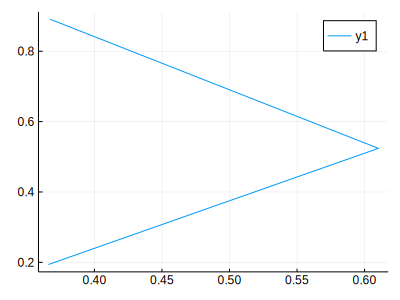

In [7]:
using Plots
gr(size=(400,300))
plot(rand(3), rand(3))

# LinearOperators

- v -> Av
- v -> Aᵀv
- v -> A*v

In [10]:
using LinearOperators

prod(v) = [v[1] + v[2]; 2v[1] + 3v[2]] # [1 1; 2 3] * [v[1]; v[2]]
tprod(v) = [v[1] + 2v[2]; v[1] + 3v[2]]

A = LinearOperator(Float64, 2, 2, false, false, prod, tprod, tprod)

A * [0.2; 0.5]

2-element Array{Float64,1}:
 0.7
 1.9

In [11]:
A = rand(5, 2)

5×2 Array{Float64,2}:
 0.374079  0.492553
 0.187629  0.600294
 0.183658  0.398463
 0.736983  0.434411
 0.779344  0.406829

In [12]:
opA = LinearOperator(A)

Linear operator
  nrow: 5
  ncol: 2
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



In [24]:
A = rand(5000, 5000);
B = rand(5000, 5000);
@time C = A * B;

  4.008001 seconds (2 allocations: 190.735 MiB)


In [25]:
opA = LinearOperator(A)
opB = LinearOperator(B)
@time opA * opB

  0.000010 seconds (4 allocations: 176 bytes)


Linear operator
  nrow: 5000
  ncol: 5000
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



In [26]:
v = rand(5000)

@time (A * B) * v
@time A * (B * v)
@time (opA * opB) * v
@time opA * (opB * v);

  4.006204 seconds (4 allocations: 190.773 MiB)
  0.041024 seconds (4 allocations: 78.281 KiB)
  0.043637 seconds (8 allocations: 78.453 KiB)
  0.051469 seconds (4 allocations: 78.281 KiB)


**Should I access an operator's element?**

No

In [31]:
prod(v) = [v[1] + v[2]; 2v[1] + 3v[2]] # [1 1; 2 3] * [v[1]; v[2]]
tprod(v) = [v[1] + 2v[2]; v[1] + 3v[2]]

A = LinearOperator(Float64, 2, 2, false, false, prod, tprod, tprod)
Matrix(A)

2×2 Array{Float64,2}:
 1.0  1.0
 2.0  3.0

In [34]:
A[2,2] # Compute Z' * A * P

Linear operator
  nrow: 1
  ncol: 1
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



In [35]:
Matrix(A[2,2])

1×1 Array{Float64,2}:
 3.0

In [36]:
# Using opExtension, opRestriction

In [37]:
A = rand(5, 2)
opA = LinearOperator(A)

Linear operator
  nrow: 5
  ncol: 2
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



In [39]:
A * ones(2) == opA * ones(2)

true

In [41]:
opA' * ones(5)

2-element Array{Float64,1}:
 2.9377342310451233
 1.1810979848574872

In [42]:
pkg"add FFTW"

  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/linear-operators/Project.toml`
  [7a1cc6ca] + FFTW v1.2.0
   Updating `~/Documents/streaming/notebooks/tutorials/linear-operators/Manifest.toml`
  [621f4979] + AbstractFFTs v0.5.0
  [7a1cc6ca] + FFTW v1.2.0
  [f5851436] + FFTW_jll v3.3.9+5
  [1d5cc7b8] + IntelOpenMP_jll v2018.0.3+0
  [856f044c] + MKL_jll v2019.0.117+2


In [43]:
using FFTW, LinearAlgebra

A = LinearOperator(16, 16, false, false, fft, nothing, ifft)

v = rand(16) + im * rand(16)
A * v

16-element Array{Complex{Float64},1}:
     8.946161193394072 + 8.045984280505243im
    0.1742357191505106 + 0.3086013649576881im
   -0.7998530430635715 + 0.1115711495074454im
    -0.571398395752621 + 0.4544987711531042im
   -0.2704035645753835 - 1.9213665753970317im
     2.324686823971292 + 0.5140642148647618im
 -0.007250822847700414 - 0.846160591182173im
     1.176282988707905 - 0.9399125991116004im
   -0.9915573471002972 - 1.2934188837560376im
    -1.287207915709439 + 1.4402476202412147im
  -0.08436271058601133 + 2.053446184649336im
    1.0016829875186235 + 1.0366293915288958im
    -1.043324233945478 - 0.4355521279299075im
      1.54306565608972 + 2.213251096982505im
   0.23391290302568207 + 0.6780221260155858im
   0.20842004995391392 - 0.5432979505790254im

In [44]:
A' * v

16-element Array{Complex{Float64},1}:
      0.5591350745871295 + 0.5028740175315777im
     0.01302625312211962 - 0.03395612191118909im
     0.01461955643910513 + 0.04237638287597411im
      0.0964416035056075 + 0.13832819356140658im
    -0.06520776462159238 - 0.02722200799561922im
     0.06260518671991397 + 0.06478933697055599im
   -0.005272669411625708 + 0.1283403865405835im
    -0.08045049473183993 + 0.09001547626507592im
   -0.061972334193768575 - 0.08083868023475235im
     0.07351768679424406 - 0.058744537444475026im
 -0.00045317642798127587 - 0.052885036948885814im
     0.14529292649820574 + 0.032129013429047615im
    -0.01690022278596147 - 0.12008541096231448im
    -0.03571239973453881 + 0.028406173197069014im
    -0.04999081519147322 + 0.0069731968442153375im
    0.010889732446906912 + 0.019287585309855505im

In [49]:
A' * (A * v) ≈ v

true

In [47]:
norm(A' * (A * v) - v)

4.0697662735997785e-16

In [50]:
Matrix(A' * A) ≈ Matrix(I, 16, 16)

true

In [51]:
opA = LinearOperator(rand(3, 3))
opB = LinearOperator(rand(3, 3))

opA + opB

Linear operator
  nrow: 3
  ncol: 3
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



In [56]:
transpose(conj(opA * 2 - 3 * opB')')

Linear operator
  nrow: 3
  ncol: 3
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



**Misuse of nonlinear in LinearOperators**

In [84]:
prod(v) = [v[1]^2 + v[2]^2; v[1] * v[2]]
tprod(v) = [v[1] + 2v[2]; v[1] + 3v[2]]

A = LinearOperator(Float64, 2, 2, false, false, prod, tprod, tprod)
Matrix(A)

2×2 Array{Float64,2}:
 1.0  1.0
 0.0  0.0

## Large problems in optimization

In [57]:
using ForwardDiff

f(x) = (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2
∇f(x) = ForwardDiff.gradient(f, x)
Hv(x, v) = ForwardDiff.derivative(t -> ∇f(x + t * v), 0.0)

Hv (generic function with 1 method)

In [58]:
x = [-1.2; 1.0]

f(x), ∇f(x)

(24.199999999999996, [-215.59999999999997, -87.99999999999999])

In [59]:
v = ones(2)
Hv(x, v)

2-element Array{Float64,1}:
 1809.9999999999998
  680.0

In [61]:
ForwardDiff.hessian(f, x) * v

2-element Array{Float64,1}:
 1810.0
  680.0

In [62]:
opHatx(x) = LinearOperator(Float64, 2, 2, true, true, v -> Hv(x, v))

opHatx (generic function with 1 method)

In [63]:
opH = opHatx(x)

Linear operator
  nrow: 2
  ncol: 2
  eltype: Float64
  symmetric: true
  hermitian: true
  nprod:   0
  ntprod:  0
  nctprod: 0



In [64]:
opH * v

2-element Array{Float64,1}:
 1809.9999999999998
  680.0

In [66]:
using Krylov # Implement Conjugate Gradient - more on future tutorials

while norm(∇f(x)) > 1e-6
    opH = opHatx(x)
    d, ks = Krylov.cg(opH, -∇f(x)) # Solution of the system H(x)d = -∇f(x)
    x += d
end

x, ∇f(x)

([0.9999999999999999, 0.9999999999814724], [7.410960511933238e-9, -3.7054803669889225e-9])

## Preallocated operators

In [71]:
m, n = 50, 30
A = rand(50, 30)
op1 = LinearOperator(A)
op2 = PreallocatedLinearOperator(A) # create a vector for storing Av
v = rand(n);

In [73]:
al = @allocated for i = 1:100
    op1 * v
end
al

49600

In [74]:
al = @allocated for i = 1:100
    op2 * v
end
al

0

In [83]:
Aones = op2 * ones(n)
Atwos = op2 * (2 * ones(n)); # Changes the internal memory

In [85]:
Aones === Atwos

true

### Inverse operators

In [93]:
A = rand(5, 5)
A = A' * A + I
b = A * ones(5)

opA = LinearOperator(A)
opAinv = opInverse(A)
opAchol = opCholesky(A)

Linear operator
  nrow: 5
  ncol: 5
  eltype: Float64
  symmetric: true
  hermitian: true
  nprod:   0
  ntprod:  0
  nctprod: 0



In [91]:
opAinv * b

5-element Array{Float64,1}:
 1.0000000000000004
 1.0000000000000007
 0.9999999999999988
 1.0000000000000004
 1.0000000000000004

In [92]:
opAchol * b

5-element Array{Float64,1}:
 1.0000000000000004
 1.0
 0.999999999999999
 1.0000000000000002
 1.0000000000000007

In [94]:
Krylov.cg(opA, b)

([0.9999999999999422, 0.9999999999999255, 0.9999999999999524, 0.9999999999999439, 0.9999999999999344], 
Simple stats
  solved: true
  inconsistent: false
  residuals:  [ 1.8e+01  3.8e-01  9.8e-02  6.8e-03  1.3e-03  1.1e-12 ]
  Aresiduals: []
  status: solution good enough given atol and rtol
)

In [95]:
Krylov.cg(opA, b, M=opAchol)

([1.0000000000000007, 1.0000000000000002, 0.9999999999999987, 1.0000000000000004, 0.9999999999999997], 
Simple stats
  solved: true
  inconsistent: false
  residuals:  [ 6.4e+00  6.7e-16 ]
  Aresiduals: []
  status: solution good enough given atol and rtol
)

## BFGS Operators

In [98]:
B = LBFGSOperator(5, scaling=false)
H = InverseLBFGSOperator(5, scaling=false)

Linear operator
  nrow: 5
  ncol: 5
  eltype: Float64
  symmetric: true
  hermitian: true
  nprod:   0
  ntprod:  0
  nctprod: 0



In [99]:
B * ones(5)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [100]:
s = rand(5)
y = rand(5)
push!(B, s, y) # s = xₖ₊₁ - xₖ, y = ∇f(xₖ₊₁) - ∇f(xₖ)

Linear operator
  nrow: 5
  ncol: 5
  eltype: Float64
  symmetric: true
  hermitian: true
  nprod:   1
  ntprod:  0
  nctprod: 0



In [101]:
B * ones(5)

5-element Array{Float64,1}:
 0.30087051250127916
 0.2741514306687156
 0.15426237166249435
 1.4713507119542513
 2.1279737389023086

In [102]:
push!(H, s, y)

Linear operator
  nrow: 5
  ncol: 5
  eltype: Float64
  symmetric: true
  hermitian: true
  nprod:   0
  ntprod:  0
  nctprod: 0



In [103]:
H * (B * ones(5))

5-element Array{Float64,1}:
 1.0000000000000002
 1.0000000000000002
 1.0000000000000002
 1.0000000000000004
 1.0

In [115]:
H = InverseLBFGSOperator(2, 2) # nvar, mem

iter = 0
x = [-1.2; 1.0]
gx = ∇f(x)
while !(norm(gx) < 1e-6 || iter > 10_000)
    #d = -gx
    d = -H * gx
    slope = dot(d, gx)
    t = 1.0
    while !(f(x + t * d) < f(x) + 1e-4 * t * slope)
        t /= 2
    end
    x += t * d
    s = t * d
    gxp = ∇f(x)
    y = gxp - gx
    gx = gxp
    push!(H, s, y)
    iter += 1
end

x, ∇f(x), iter

([1.0000000051838849, 1.0000000106534566], [-1.0390695385617519e-7, 5.713736150880777e-8], 677)

In [119]:
B = LBFGSOperator(2, 2) # nvar, mem

iter = 0
x = [-1.2; 1.0]
gx = ∇f(x)
Δ = 1.0
while !(norm(gx) < 1e-6 || iter > 10_000)
    d, ks = Krylov.cg(B, -gx, radius=Δ)
    # Update Δ
    x += d
    s = d
    gxp = ∇f(x)
    y = gxp - gx
    gx = gxp
    push!(B, s, y)
    iter += 1
end

x, ∇f(x), iter

([1.0000000337283783, 1.0000000676093637], [6.4143834083636564e-9, 3.0521185578891163e-8], 100)

# Application: Heat Equation

https://juliasmoothoptimizers.github.io/JSOTutorials.jl/linear-operators/introduction-to-linear-operators/introduction-to-linear-operators.html

a plate with length L, with no heat exchange on the boundaries.

\begin{align}
\begin{bmatrix}
T & 2D \\
D & T & D \\
  & D & T & D \\
  &   & 2D & T
\end{bmatrix}
\end{align}
where
\begin{align}
T = \begin{bmatrix}
\kappa & 2\gamma \\
\gamma & \kappa & \gamma \\
  & \gamma & \kappa & \gamma \\
  &   & 2\gamma & \kappa
\end{bmatrix}
\end{align}
and $D = \text{diag}(\gamma,\dots,\gamma)$.

In [121]:
function HeatEquationOp(L, # length
                        m, # number of points in the grid
                        δ, # The time step
                        α, # heat coefficient
                )
    h = L / (m - 1) # spatial step
    γ = α * δ / h^2
    κ = 1 - 4γ
    
    Tprod(v) = [κ * v[1] + 2γ * v[2];
                [γ * v[i-1] + κ * v[i] + γ * v[i+1] for i = 2:m-1]
                κ * v[m] + 2γ * v[m-1]]
    
    T = LinearOperator(Float64, m, m, false, false, Tprod)
    D = opEye(m) * γ
    
    function prod(v)
        Hv = zeros(m^2)
        Hv[1:m] .= [T  2D] * v[1:2m]
        for i = 2:m-1
            Hv[(i-1)*m+1:i*m] .= [D T D] * v[(i-2)*m+1:(i+1)*m]
        end
        Hv[end-m+1:end] .= [2D T] * v[end-2m+1:end]
        return Hv
    end
    
    return LinearOperator(Float64, m^2, m^2, false, false, prod)
end

HeatEquationOp (generic function with 1 method)

In [127]:
A = HeatEquationOp(1.0, 3, 0.1, 0.1)
Matrix(A)

9×9 Array{Float64,2}:
 0.84  0.08  0.0   0.08  0.0   0.0   0.0   0.0   0.0
 0.04  0.84  0.04  0.0   0.08  0.0   0.0   0.0   0.0
 0.0   0.08  0.84  0.0   0.0   0.08  0.0   0.0   0.0
 0.04  0.0   0.0   0.84  0.08  0.0   0.04  0.0   0.0
 0.0   0.04  0.0   0.04  0.84  0.04  0.0   0.04  0.0
 0.0   0.0   0.04  0.0   0.08  0.84  0.0   0.0   0.04
 0.0   0.0   0.0   0.08  0.0   0.0   0.84  0.08  0.0
 0.0   0.0   0.0   0.0   0.08  0.0   0.04  0.84  0.04
 0.0   0.0   0.0   0.0   0.0   0.08  0.0   0.08  0.84

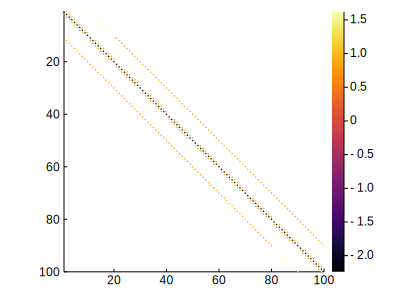

In [131]:
using SparseArrays

A = HeatEquationOp(1.0, 10, 0.1, 0.1)
spy(sparse(Matrix(A)))

In [132]:
function HeatEquation(u0, L, m, δ, α)
    h = L / (m - 1)
    U = zeros(m^2)
    for i = 1:m
        x = (i - 1)* h
        for j = 1:m
            y = (j - 1) * h
            U[(i-1) * m + j] = u0(x, y)
        end
    end
    A = HeatEquationOp(L, m, δ, α)
    
    return U, A
end

HeatEquation (generic function with 1 method)

In [161]:
L = 1.0
u0(x, y) = 16 * x * (L - x) * y * (L - y)
m = 30
δ = 0.001
α = 0.1

U, A = HeatEquation(u0, L, m, δ, α)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Linear operator
  nrow: 900
  ncol: 900
  eltype: Float64
  symmetric: false
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0

)

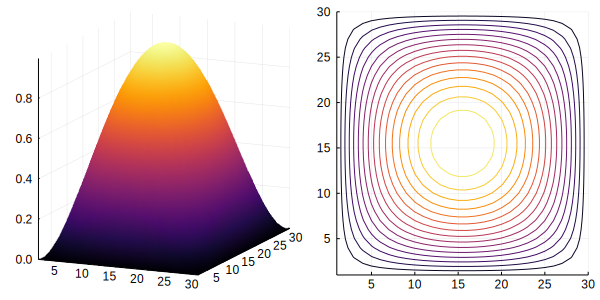

In [162]:
layout = @layout [a b]
p = plot(layout=layout, size=(600,300), leg=false)
surface!(p[1], reshape(U, m, m))
contour!(p[2], reshape(U, m, m))

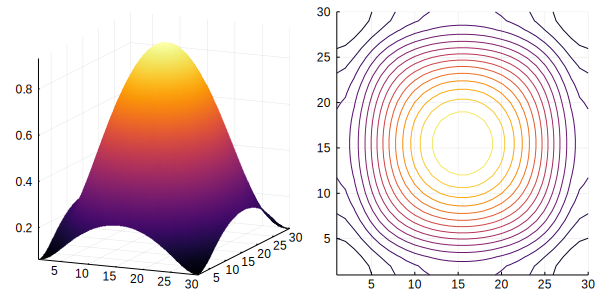

In [203]:
U = A * U
layout = @layout [a b]
p = plot(layout=layout, size=(600,300), leg=false)
surface!(p[1], reshape(U, m, m))
contour!(p[2], reshape(U, m, m))

In [208]:
[opA opA]' * ones(5)

10-element Array{Float64,1}:
 8.008863853855317
 9.684561628392027
 6.585062700750447
 7.833426577906542
 8.73954103767486
 8.008863853855317
 9.684561628392027
 6.585062700750447
 7.833426577906542
 8.73954103767486